In [68]:
import pandas as pd 
df = pd.read_csv('../Downloads/archive/zoo.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [69]:
df2 = pd.read_csv('../Downloads/archive/class.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
Class_Number                         7 non-null int64
Number_Of_Animal_Species_In_Class    7 non-null int64
Class_Type                           7 non-null object
Animal_Names                         7 non-null object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [70]:
feature_names = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic']

In [71]:
X = df[feature_names]
y = df['class_type'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, test_size=.8,random_state=42)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)


In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#let's see how well it worked
pred = clf.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 0.89

[[37  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  0  0  0  4  0  1]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  3  4]
 [ 0  0  0  0  0  0  7]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        14
           3       0.00      0.00      0.00         5
           4       1.00      1.00      1.00         8
           5       0.43      1.00      0.60         3
           6       1.00      0.43      0.60         7
           7       0.58      1.00      0.74         7

    accuracy                           0.89        81
   macro avg       0.72      0.78      0.71        81
weighted avg       0.88      0.89      0.87        81



In [73]:
clf.score(X_test,y_test)

0.8888888888888888

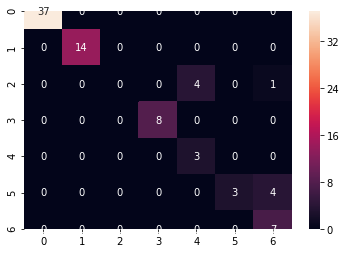

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
#plt.figure(figsize=(10,10))
cf_matrix=confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True)